#### Name : Tushar Shirsath
#### Roll No : 220940325083   

# Q.2

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Dell\Desktop\ML_Module_Exam\Data\data_final.xlsx')
df

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


### Data Understanding

In [3]:
df.shape

(100, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [6]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [7]:
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

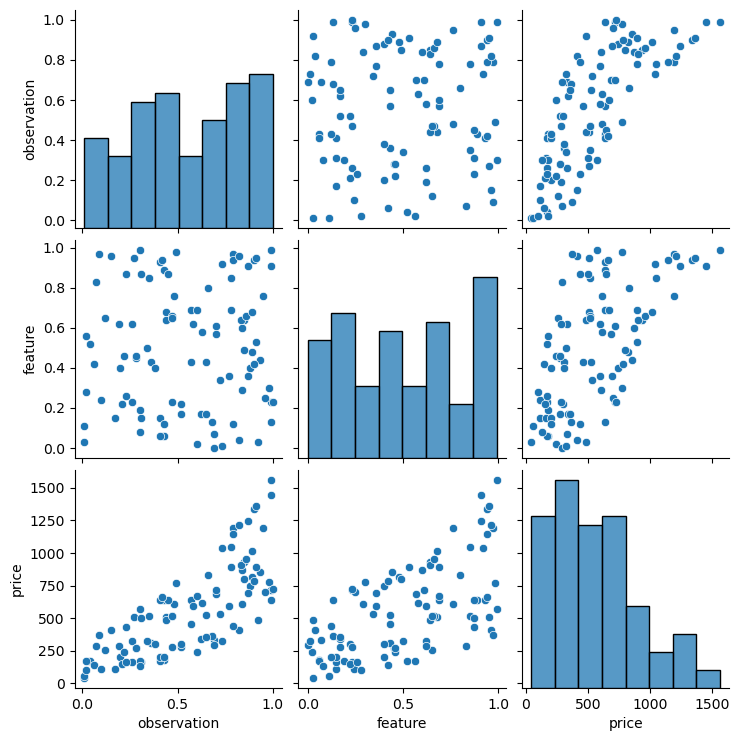

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,observation,feature,price
observation,1.000000,0.041766,0.764315
feature,0.041766,1.000000,0.627476
price,0.764315,0.627476,1.000000


In [10]:
# Dataset has Two independent Variabale and One dependent variable

In [11]:
x = df.drop('price', axis=1)
x

,observation,feature
0,0.44,0.68
1,0.99,0.23
2,0.84,0.29
3,0.28,0.45
4,0.07,0.83
...,...,...
95,0.99,0.13
96,0.28,0.46
97,0.87,0.36
98,0.23,0.87


In [12]:
y = df.price
y

0     511.14
1     717.10
2     607.91
3     270.40
4     289.88
       ...  
95    636.22
96    272.12
97    696.65
98    434.53
99    593.86
Name: price, Length: 100, dtype: float64

In [13]:
x.shape, y.shape

((100, 2), (100,))

In [14]:
# Train and Test Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

#### As number of independent feature are more than one so we will go with Multiple Linear Regression Model

## Multiple Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)
y_pred

array([ 749.76896963,  735.98936824,  -48.85992817, 1062.20644707,
        716.69328274, 1194.90581714,  975.78229373,  796.22763539,
        157.64413694,  573.18572683,  897.84604006,  392.4709254 ,
        557.34034613,  876.99318895,  726.73794801,  354.96783965,
        919.53346956,  579.16989129,  870.75451763, 1063.1120833 ])

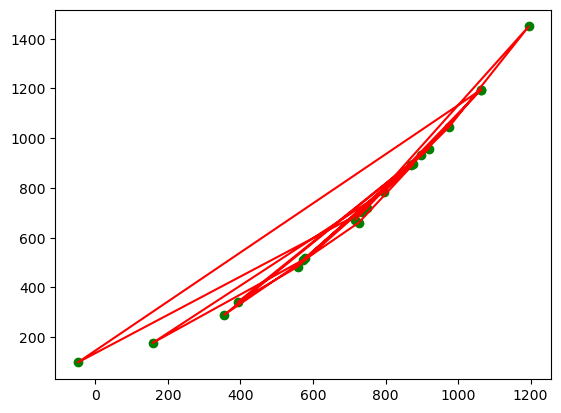

In [20]:
# Now we will plot scatter plot

plt.scatter(y_pred, y_test, color = 'green')
plt.plot(y_pred, y_test, color = 'red')
plt.show()

In [21]:
model.predict([[0.40, 0.65]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([519.25718884])

#### Result with error calculation and Performance of Model

In [22]:
from sklearn import metrics

#### Mean Absolute error

In [23]:
round(metrics.mean_absolute_error(y_test, y_pred),2)

68.25

#### Mean Squared Error

In [24]:
round(metrics.mean_squared_error(y_test, y_pred) ,2)

7901.48

#### Median Absolute Error

In [25]:
round(metrics.median_absolute_error(y_test, y_pred),2)

56.08

#### Explained Varience Score

In [26]:
round(metrics.explained_variance_score(y_test, y_pred),2)

0.94

#### OLS Summary Report

In [27]:
import statsmodels.api as sm
constant = sm.add_constant(x_train)
op = sm.OLS(y_train, constant).fit()
op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     553.4
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.04e-46
Time:                        17:38:06   Log-Likelihood:                -468.52
No. Observations:                  80   AIC:                             943.0
Df Residuals:                      77   BIC:                             950.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -249.7765     24.830    -10.059      0.000    -299.219    -200.334
observation   855.8957     33.498     25.550      0.000     789.192     922.600
feature       656.4236     31.261     20.998      0.000     594.174     718.673
==============================================================================
Omnibus:                       33.673   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.429
Skew:                           1.656   Prob(JB):                     7.55e-14
Kurtosis:                       5.675   Cond. No.                         5.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# From above report we can see that R-squared value is 0.935 . 

In [29]:
# Now we will build model using Polynomial Regression

## Polynomial Regression Model Building

In [30]:
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree=3)
x_poly = model.fit_transform(x_train)
lg = LinearRegression()
lg.fit(x_poly, y_train)

LinearRegression()

In [31]:
y_pred1 = lg.predict(model.fit_transform(x_test))
y_pred1

array([ 716.52240373,  704.37562725,   97.24650833, 1204.76400021,
        669.68357104, 1455.2008966 , 1040.15954211,  785.86534227,
        178.57434028,  504.97788554,  929.36965021,  339.75359125,
        486.26458087,  902.35416128,  659.78240988,  294.35425077,
        962.79883875,  512.84840805,  884.0971578 , 1181.89303059])

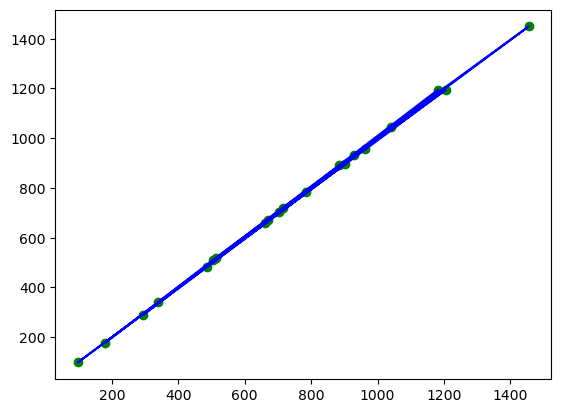

In [32]:
# We will see it on scatter plot
plt.scatter(y_pred1, y_test, color = 'green')
plt.plot(y_pred1, y_test, color='blue')
plt.show()

In [33]:
metrics.r2_score(y_test, y_pred1)

0.9997458144373799

## Conclusion

####  Here i have build  two different models . One using Multiple Regression and Second using Polynomial Regression. From this two model i can conclude that Polynomial Regression model is more accurate tahn Multiple linear regression model